<a href="https://colab.research.google.com/github/m123m12/Rental-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Name: Seoul_Bike_Sharing_Demand_Prediction**

**Name: GRANDHI MADHAVA NAIDU**

**Github link:https://github.com/m123m12/Rental-Bike-Sharing-Demand-Prediction

**Problem Description:**

**Currently rental bikes are introduced in  many urban cities for the enhancement of mobility comfort.** **It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time.** **Eventually,providing the city with a stable supply of rental bikes becomes a major concern.** **The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

**Business objective:**

**Because rental bike sharing is growing,so the availability of bike at right time is really important for companies.** **In this project I have data set of Seoul city.**  **The data set contain information like weather condition,holiday,date,number of rented bike count,hours.** **Based on this data I have to predict bikes count at each hour for the stable supply of rental bikes.**

**Data Description:**

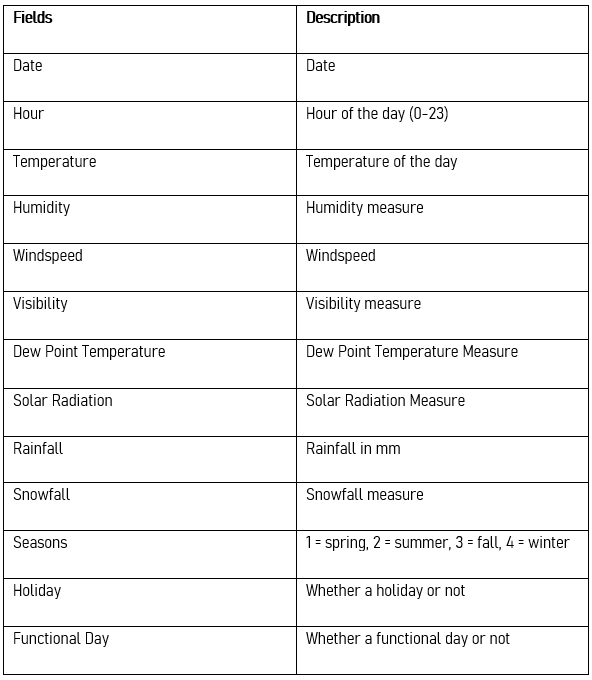

In [ ]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import math
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#loading the dataset
bikedata=pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding='latin')

In [ ]:
#here we copy the dataframe to other instance to ensure efficiency if there is a need of change.
bikedata1=bikedata.copy()

In [ ]:
#check the details of the data set
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
#check the description of the data set
bikedata.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
#check the first five rows of a data set
bikedata.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#check the last five rows of adata set
bikedata.tail()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
#check the shape of the data set
bikedata.shape

(8760, 14)

In [ ]:
#check the data types
bikedata.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [ ]:
#check null values in each column
bikedata.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
#check the duplicate values in data set
len(bikedata[bikedata.duplicated()])

0

There is no null values and no duplicated values in given data set.

In [ ]:
bikedata.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

 **convert 'Date' column from object datatype to datetime datatype**

In [ ]:
bikedata['Date'] = pd.to_datetime(bikedata['Date'])

**Extracting the Date,Month and Year from Date column:**

In [ ]:
bikedata['Day'] = bikedata['Date'].dt.day
bikedata['Month'] = bikedata['Date'].dt.month
bikedata['Year'] = bikedata['Date'].dt.year
bikedata['Weekday'] = bikedata['Date'].dt.day_name()

     

In [ ]:
bikedata.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday


In [ ]:
#Drop the Date column
bikedata=bikedata.drop('Date',axis=1)

In [ ]:
bikedata.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1,2017,Thursday


**Exploratory Data Analysis:**

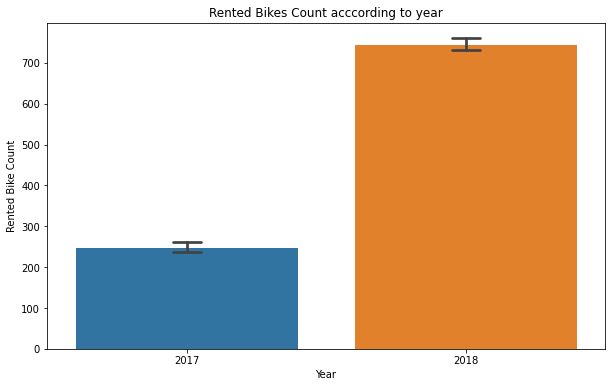

In [ ]:
#Analysis of Rental bikes according to year
fig,ax=plt.subplots(figsize=(10,6))
sns.set_style("dark")
sns.barplot(data=bikedata,x='Year',y='Rented Bike Count',ax=ax,capsize=.1)
ax.set(title='Rented Bikes Count acccording to year')
plt.show()


The people used rental bikes highly in year 2018 as compared to the year 2017.

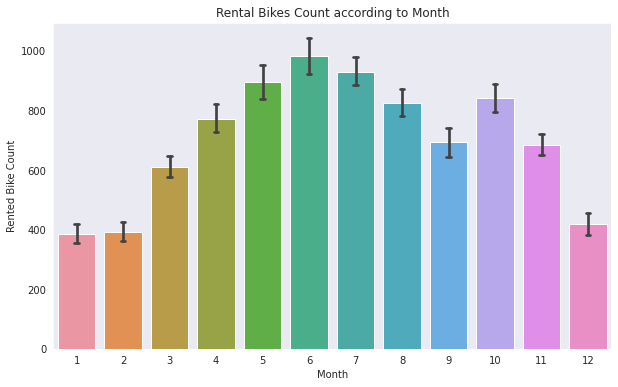

In [ ]:
#Analysis of rental bikes according to month
fig,ax=plt.subplots(figsize=(10,6))
sns.set_style('ticks')
sns.barplot(data=bikedata,x='Month',y='Rented Bike Count',ax=ax,capsize=.1)
ax.set(title='Rental Bikes Count according to Month')
plt.show()

The usage of Rental bikes highly between 5 to 10 months as compared to the other months.

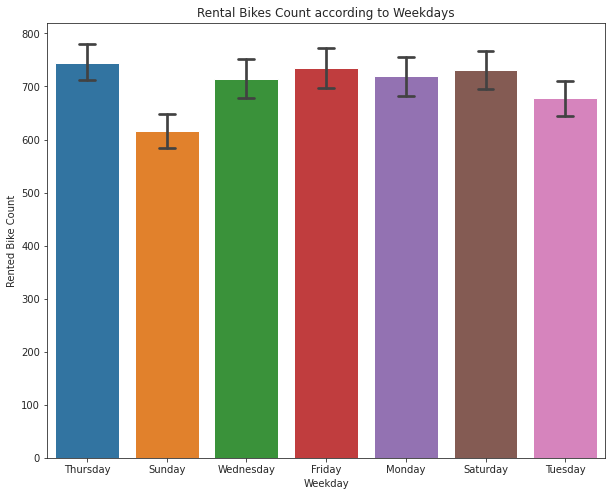

In [ ]:
#Analysis of Rental bikes according to Weekdays
fig,ax=plt.subplots(figsize=(10,8))
sns.set_style("white")
sns.barplot(data=bikedata,x='Weekday',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Rental Bikes Count according to Weekdays')
plt.show()

The people who use rental bikes are decreased on Sunday as compared to the other days.

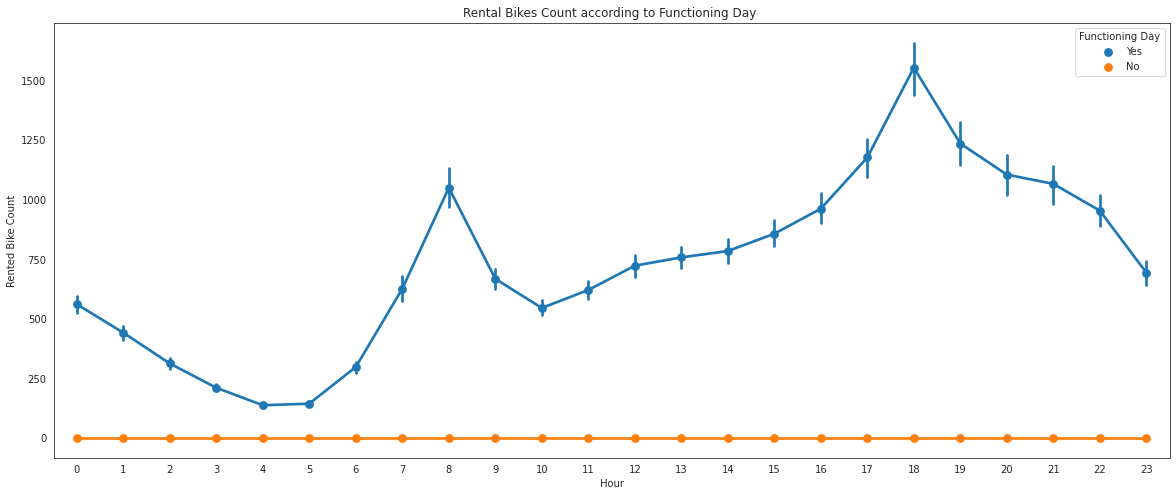

In [ ]:
#Analysis of Rental bikes according to Functioning days
fig,ax=plt.subplots(figsize=(20,8))
sns.set_style("white")
sns.pointplot(data=bikedata,x='Hour',y='Rented Bike Count',hue='Functioning Day',ax=ax)
ax.set(title='Rental Bikes Count according to Functioning Day ')
plt.show()

There is no rental bikes count on non Functioning Day.

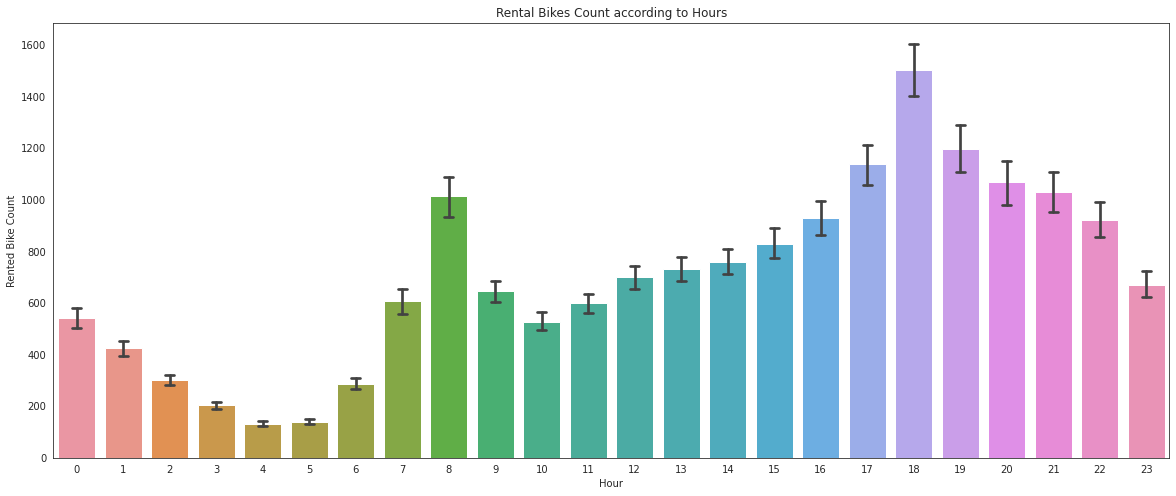

In [ ]:
#Analysis of Rental bikes according to Hours
fig,ax=plt.subplots(figsize=(20,8))
sns.set_style("dark")
sns.barplot(data=bikedata,x='Hour',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Rental Bikes Count according to Hours')
plt.show()

The people use rental bikes highly between 7 A.M to 9 A.M and 5 P.M to 9 P.M

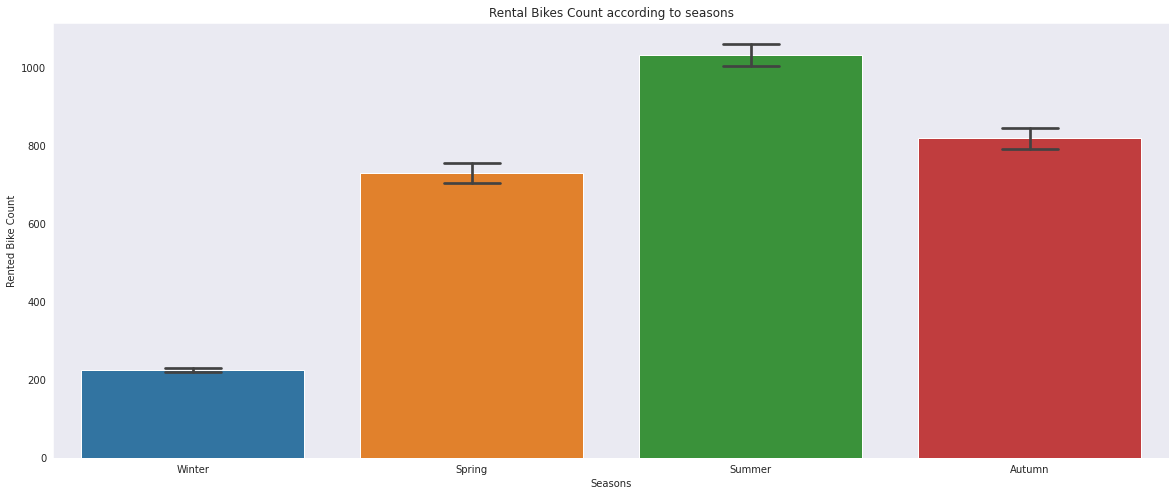

In [ ]:
#Analysis of Rental bikes according to seasons
fig,ax=plt.subplots(figsize=(20,8))
sns.set_style("dark")
sns.barplot(data=bikedata,x='Seasons',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Rental Bikes Count according to seasons')
plt.show()

Rental bikes count is maximum in Summer and minimum in Winter.

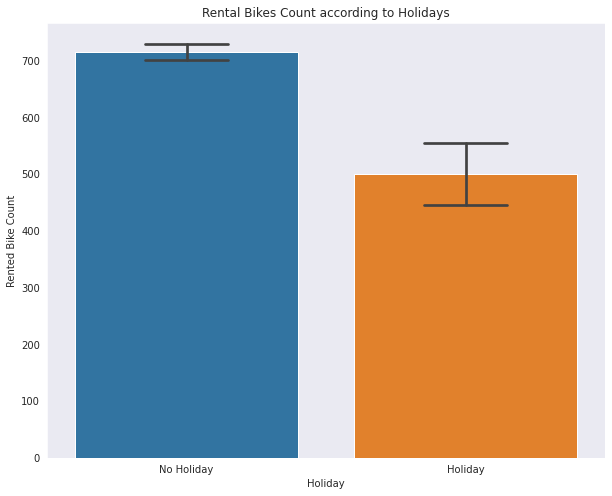

In [ ]:
#Analysis of rental bikes according to Holidays
fig,ax=plt.subplots(figsize=(10,8))
sns.set_style("white")
sns.barplot(data=bikedata,x='Holiday',y='Rented Bike Count',ax=ax,capsize=.3)
ax.set(title='Rental Bikes Count according to Holidays')
plt.show()

The people use rental bikes minimum on holidays as compared to the working days.

**Feature Engineering:**

In [ ]:
bikedata.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Day',
       'Month', 'Year'],
      dtype='object')

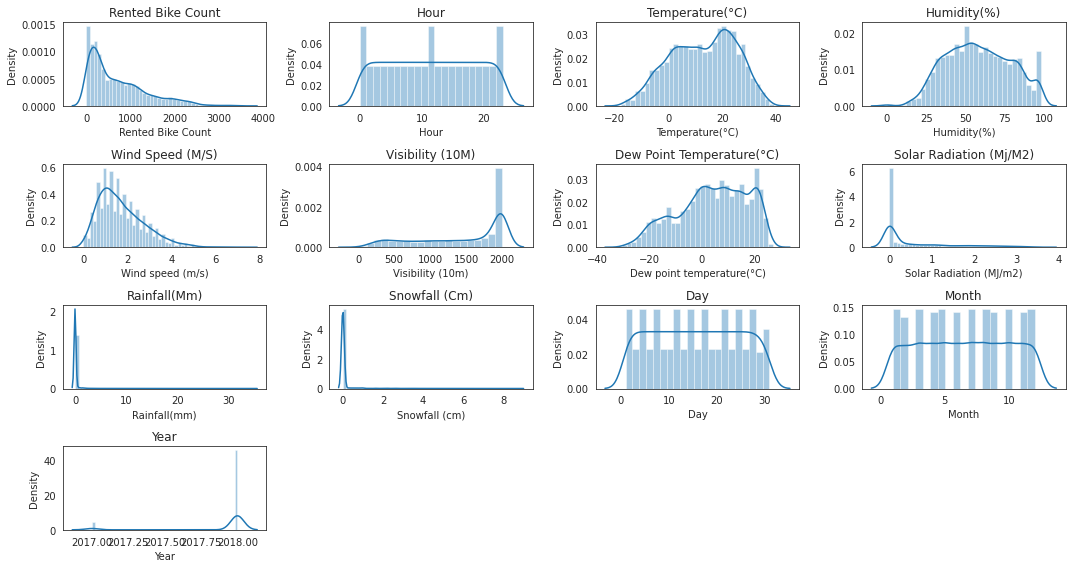

In [ ]:
#visualizing the distribution of columns
plt.figure(figsize=(15,8))
for n, column in enumerate(bikedata.describe().columns):
  plt.subplot(4, 4, n+1)
  sns.distplot(bikedata[column])
  plt.title(f'{column.title()}')
  plt.tight_layout()

From the above analysis I observe that Rented Bike Count,Wind Speed,Visibility,Solar Radiation,Rainfall and Snowfall features are not normally distributed.

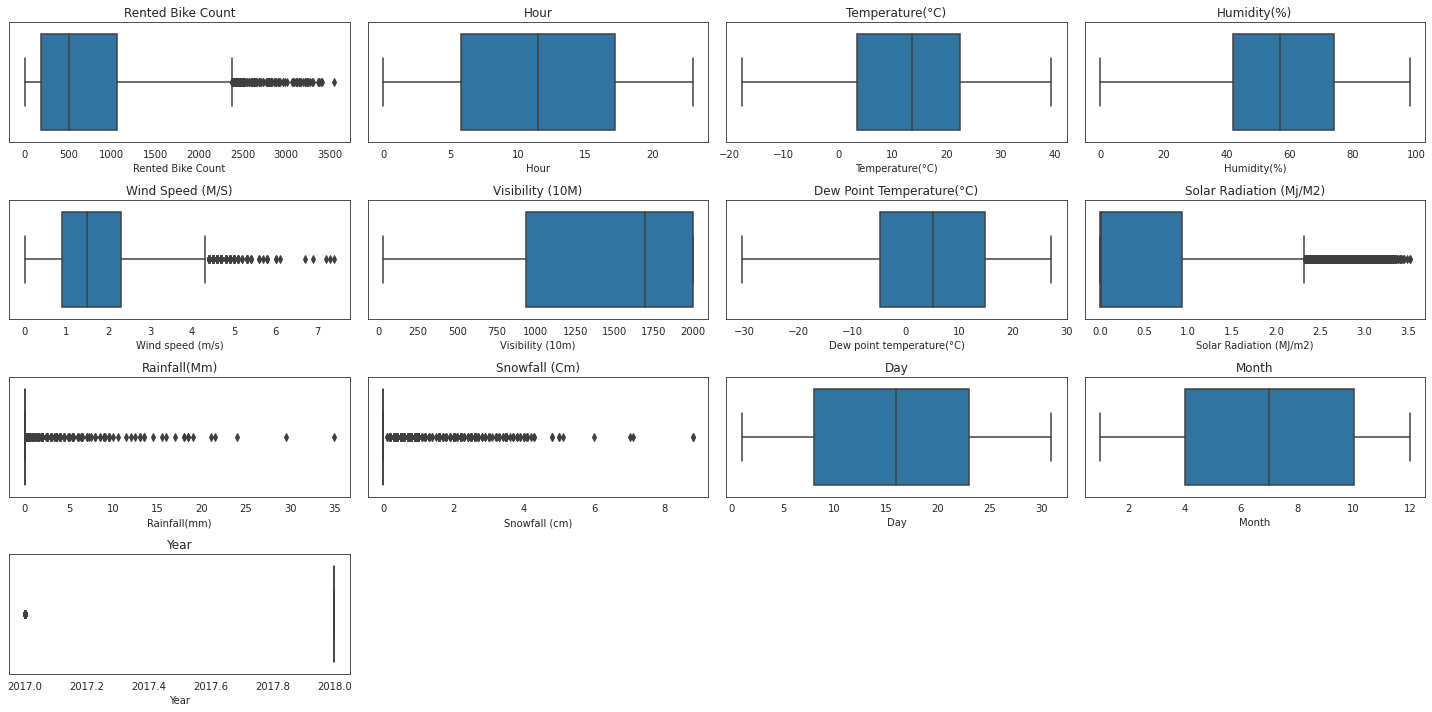

In [ ]:
# Visiualizing with boxplot  to find outliers in  dataset
plt.figure(figsize=(20,10))
for n, column in enumerate(bikedata.describe().columns):
  plt.subplot(4, 4, n+1)
  sns.boxplot(bikedata[column])
  plt.title(f'{column.title()}')
  plt.tight_layout()

The range of outliers is low.If we treat outliers may effect our model prediction.

**Regression**

In [ ]:
numeric_features=[ 'Hour', 'Temperature(°C)', 'Humidity(%)','Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)','Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']



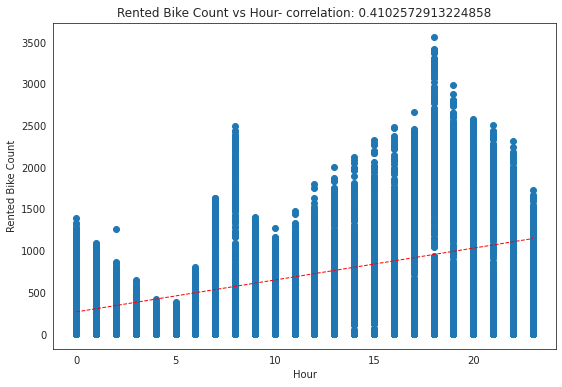

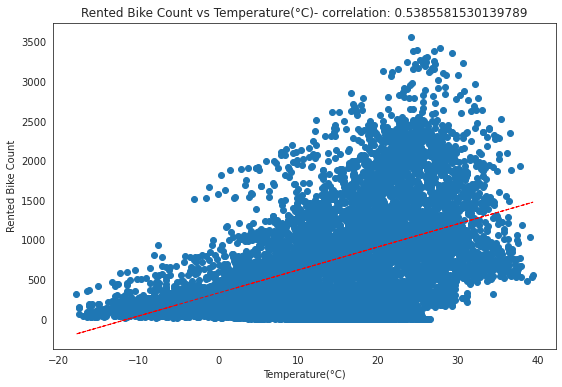

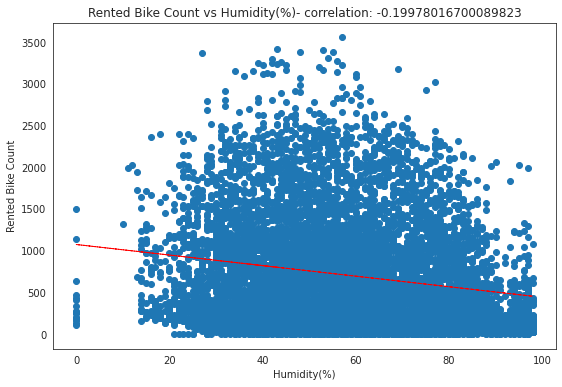

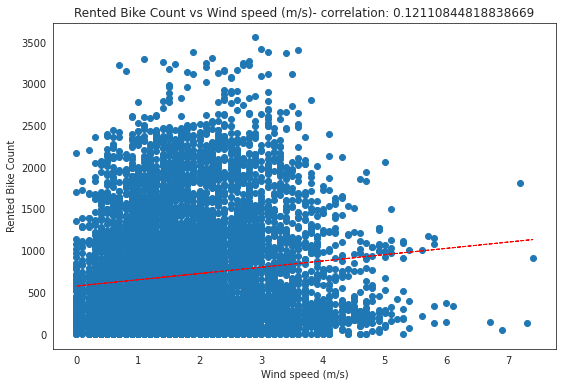

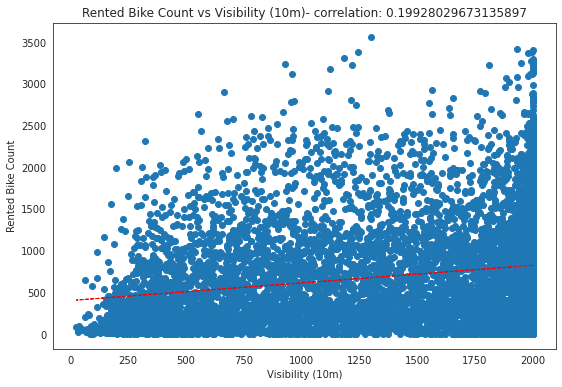

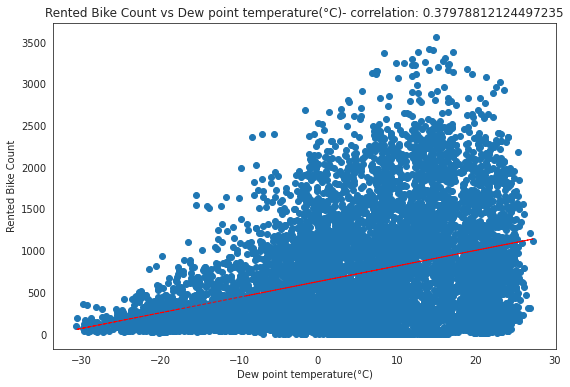

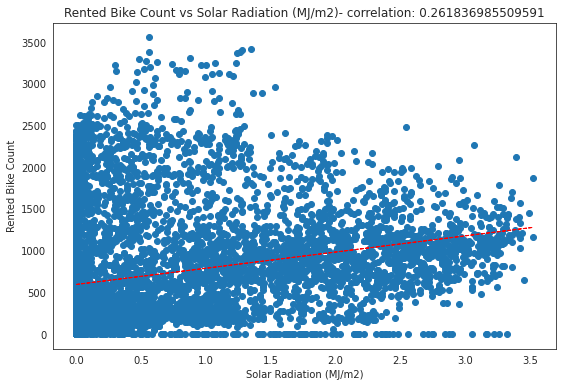

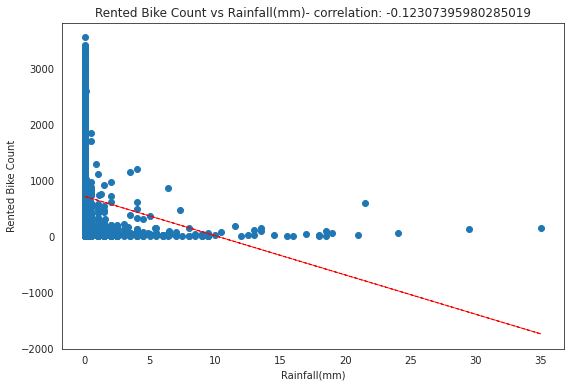

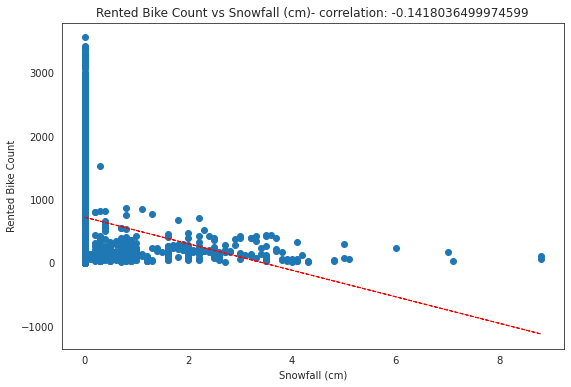

In [ ]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bikedata[col]
    label = bikedata['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(bikedata[col], bikedata['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(bikedata[col])
    plt.plot(bikedata[col], y_hat, "r--", lw=1)
plt.show()


By above analysis I observe that 

1.If there is increase in temparature the count of rental    bikes is increasing.

2.More number of bikes are rented if there is low humidity.




**Convertion of object data type to int data type:**

In [ ]:
#change the data type of Holiday and Functioning Day from object type to int type
bikedata['Holiday'] = bikedata['Holiday'].map({'No Holiday' : 0, 'Holiday' : 1})
bikedata['Functioning Day'] = bikedata['Functioning Day'].map({'No' : 0, 'Yes' : 1})
     

In [ ]:
bikedata.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,Weekday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,12,1,2017,Thursday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,12,1,2017,Thursday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,12,1,2017,Thursday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,12,1,2017,Thursday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,12,1,2017,Thursday


In [ ]:
bikedata.shape

(8760, 17)

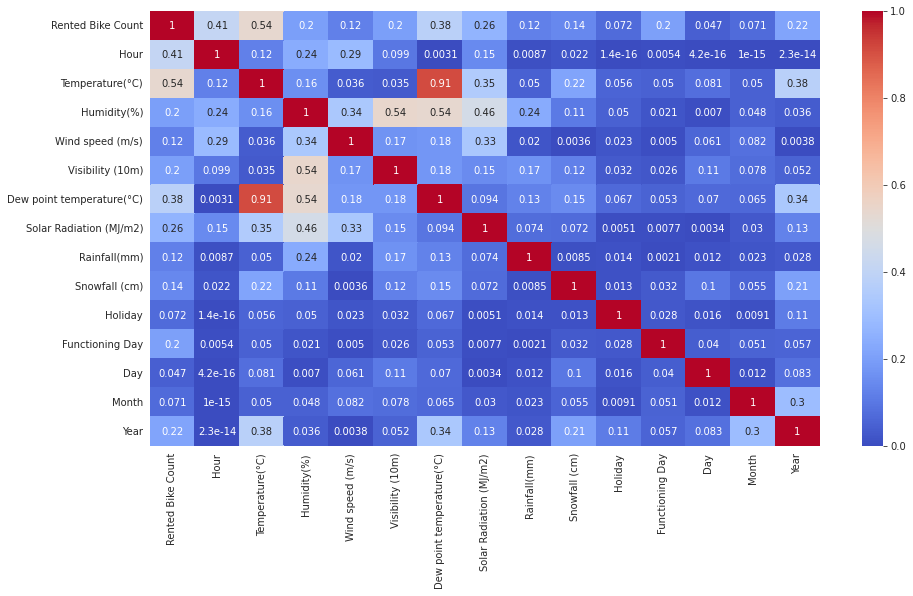

In [ ]:
 #check the correlation between columns
plt.figure(figsize=(15,8))
correlation = bikedata.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

From the above map I observe that Dew point temperature is highly correlated with temperature.So I drop the Dew point temperature column.

In [ ]:
#drop the Dew point temperature(°C)
bikedata.drop('Dew point temperature(°C)', inplace = True, axis = 1)


In [ ]:
#Making copy of our dataset for any upgrade in future
bikedata2=bikedata.copy()

**Variance Inflation Factor:**

VIF is a measure of the correlation between multiple independent variables in a multiple regression analysis.It is used to determine which independent variables are having a greater effect on the model and which ones can be removed to improve the model's accuracy.VIF should be less than 5 so that variables are less correlated.

   

In [ ]:
#importing VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
bikedata.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Functioning Day', 'Day',
       'Month', 'Year'],
      dtype='object')

In [ ]:
# Check VIF for each numerical variable
numerical_features=['Temperature(°C)','Hour', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday']

calc_vif(bikedata[[i for i in numerical_features]])
     

,variables,VIF
0,Temperature(°C),3.238208
1,Hour,3.922387
2,Humidity(%),4.878319
3,Wind speed (m/s),4.610685
4,Visibility (10m),4.730979
5,Solar Radiation (MJ/m2),2.247281
6,Rainfall(mm),1.079201
7,Snowfall (cm),1.121043
8,Holiday,1.055235


In [ ]:
#update the dataset for our model prediction
bikedata=bikedata[numerical_features+['Rented Bike Count']]

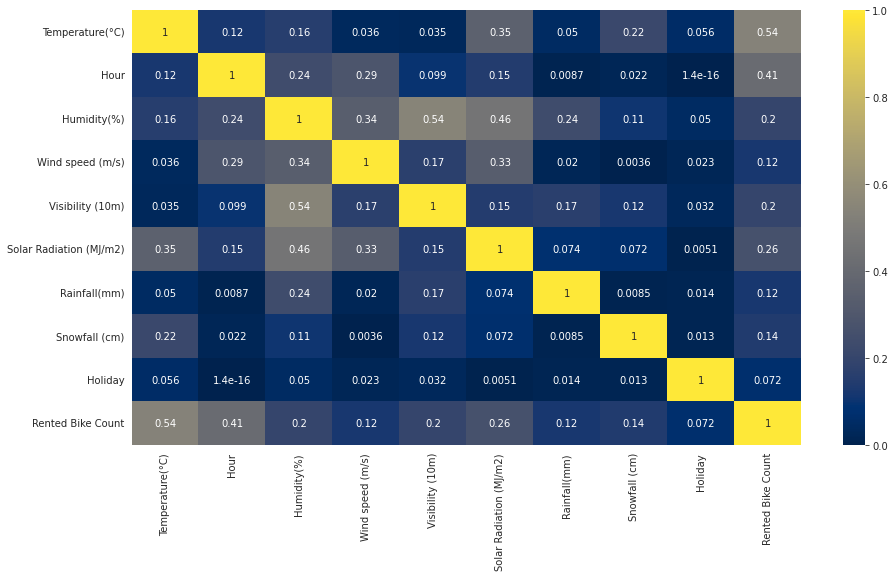

In [ ]:
#check the correlation
plt.figure(figsize=(15,8))
correlation = bikedata.corr()
sns.heatmap(abs(correlation), annot=True, cmap='cividis')

In [ ]:
bikedata.head()

,Temperature(°C),Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Rented Bike Count
0,-5.2,0,37,2.2,2000,0.0,0.0,0.0,0,254
1,-5.5,1,38,0.8,2000,0.0,0.0,0.0,0,204
2,-6.0,2,39,1.0,2000,0.0,0.0,0.0,0,173
3,-6.2,3,40,0.9,2000,0.0,0.0,0.0,0,107
4,-6.0,4,36,2.3,2000,0.0,0.0,0.0,0,78


In [ ]:
bikedata = pd.get_dummies(bikedata2, columns = ['Seasons', 'Year', 'Weekday'])
bikedata
     

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,...,Seasons_Winter,Year_2017,Year_2018,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,...,1,1,0,0,0,0,0,1,0,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,...,1,1,0,0,0,0,0,1,0,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,...,1,1,0,0,0,0,0,1,0,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,...,1,1,0,0,0,0,0,1,0,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,...,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,0,...,0,0,1,1,0,0,0,0,0,0
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,0,...,0,0,1,1,0,0,0,0,0,0
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,0,...,0,0,1,1,0,0,0,0,0,0
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,0,...,0,0,1,1,0,0,0,0,0,0


**TRAINING THE MODEL:**

In [ ]:
#import the required libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [ ]:
# splitting the data
#independent variables
X = bikedata.drop(columns = ['Rented Bike Count'] , axis = 1)
#dependent variable
y=bikedata['Rented Bike Count']
# Because of skewness we will convert it into normal distribution for linear regression.
y1 = np.sqrt(bikedata['Rented Bike Count'])
     

**Model Building using different regression techniques**

**LINEAR REGRESSION**

In [ ]:
# Train test spliting
X_train,X_test,Y_train,Y_test = train_test_split(X,y1 ,test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(7008, 25)
(1752, 25)


In [ ]:
#Scaling the independent variables for standardization
standardscalar=StandardScaler()
X_train=standardscalar.fit_transform(X_train)
X_test=standardscalar.transform(X_test)

In [ ]:
# Implementing Linear Regression

reg = LinearRegression().fit(X_train,Y_train)

In [ ]:
#check the coefficient
reg.coef_

array([ 3.37756260e+00,  5.66991897e+00, -3.32328979e+00,  1.13804790e-01,
        1.27005047e-01, -7.58233843e-01, -1.68919800e+00, -7.95485468e-03,
       -6.68171531e-01,  4.99742929e+00, -9.12987010e-02, -3.87286092e-02,
       -1.55192885e+11, -1.54959082e+11, -1.55017666e+11, -1.53949394e+11,
       -7.46268582e+11, -7.46268582e+11,  4.42479047e+12,  4.45177630e+12,
        4.51416834e+12,  4.52533275e+12,  4.51416834e+12,  4.53459497e+12,
        4.55484042e+12])

In [ ]:
reg.intercept_

23.549338831320572

In [ ]:
reg.score(X_train,Y_train)

0.6553446003715145

In [ ]:
# predicted Train and test values
 
Y_pred_train_lr = reg.predict(X_train)
Y_pred_test_lr = reg.predict(X_test)

In [ ]:
#calculating evaluation metrics for train data
#Mean Squared Error(MSE)
MSE = mean_squared_error((Y_train), (Y_pred_train_lr))
print('Mean Squared Error is ',MSE)

#Root Mean Squared Error(RMSE)
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error is ",RMSE)

#Mean Absolute Error(MAE)
MAE = mean_absolute_error((Y_train), (Y_pred_train_lr))
print('Mean Absolute Error is ', MAE)

# R-Squared Error(R2)
R2 = r2_score((Y_train), (Y_pred_train_lr))
print('R-squared Error is ', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(Y_train, Y_pred_train_lr))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 is', Adj_R2)

Mean Squared Error is  53.19174406412738
Root Mean Squared Error is  7.293267036392359
Mean Absolute Error is  5.60103870631177
R-squared Error is  0.6553446003715145
Adjusted R2 is 0.6503524885576605


In [ ]:
# Arrange a dataset for comparing performance metrics in future

dict1={'Model':'Linear Regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }

In [ ]:
#create training Dataframe for comparision of metrics
training_data=pd.DataFrame(dict1,index=[0])
     

In [ ]:
# Calculating evaluation Metrics for test data

#Mean Squared Error(MSE)
MSE = mean_squared_error((Y_test), (Y_pred_test_lr))
print('MSE :',MSE)

#Root Mean Squared Error(RMSE)
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#Mean Absolute Error(MAE)
MAE = mean_absolute_error((Y_test), (Y_pred_test_lr))
print('MAE :', MAE)

# R-squared Error
R2 = r2_score((Y_test), (Y_pred_test_lr))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(Y_test, Y_pred_test_lr))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 54.014258575701604
RMSE : 7.349439337507427
MAE : 5.673049509794896
R2 : 0.6570223996444029
Adjusted R2 : 0.6520545896740148


In [ ]:
#Arrange a dataset for comparing performance of metrics later
dict2={'Model':'Linear Regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }

In [ ]:
#create testing Dataframe for comparision of metrics
test_data=pd.DataFrame(dict2,index=[0])

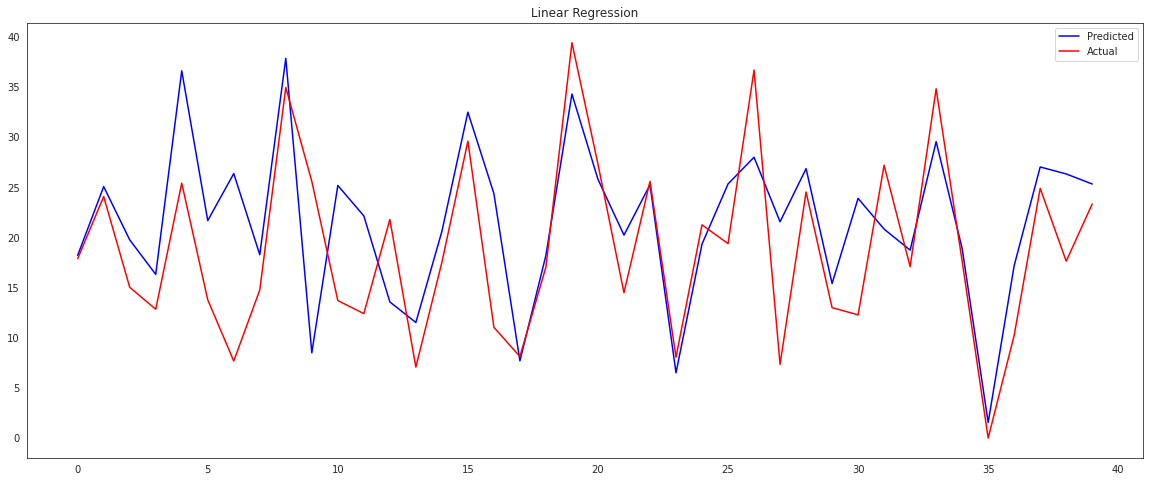

In [ ]:
#Plotting the figure for Linear Regression
plt.figure(figsize=(20,8))
plt.plot(np.array(Y_pred_test_lr)[:40], color='blue')
plt.plot(np.array(Y_test)[:40], color='r')
plt.legend(["Predicted","Actual"])
plt.title('Linear Regression')
plt.show()
     


**LASSO REGRESSION**

In [ ]:
# Implementing Lasso Regression
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, Y_train)
# Create the model score
print(lasso.score(X_test, Y_test), lasso.score(X_train, Y_train))

0.602120310150831 0.6074481861697527


In [ ]:
#predicted train and test values
Y_pred_train_lasso=lasso.predict(X_train)
Y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
#calculating evaluation metrics for train data
#Mean Squared Error(MSE)
MSE = mean_squared_error((Y_train), (Y_pred_train_lasso))
print('Mean Squared Error is ',MSE)

#Root Mean Squared Error(RMSE)
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error is ",RMSE)

#Mean Absolute Error(MAE)
MAE = mean_absolute_error((Y_train), (Y_pred_train_lasso))
print('Mean Absolute Error is ', MAE)

# R-Squared Error(R2)
R2 = r2_score((Y_train), (Y_pred_train_lasso))
print('R-squared Error is ', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(Y_train, Y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 is', Adj_R2)

Mean Squared Error is  60.5837472318009
Root Mean Squared Error is  7.783556207274468
Mean Absolute Error is  6.046248537656737
R-squared Error is  0.6074481861697527
Adjusted R2 is 0.601762325598631


In [ ]:
# Arrange a dataset for comparing performance metrics in future

dict1={'Model':'Lasso Regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }

In [ ]:
#create training Dataframe for comparision of metrics
training_data=pd.DataFrame(dict1,index=[0])
     

In [ ]:
# Calculating evaluation Metrics for test data

#Mean Squared Error(MSE)
MSE = mean_squared_error((Y_test), (Y_pred_test_lasso))
print('MSE :',MSE)

#Root Mean Squared Error(RMSE)
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#Mean Absolute Error(MAE)
MAE = mean_absolute_error((Y_test), (Y_pred_test_lasso))
print('MAE :', MAE)

# R-squared Error
R2 = r2_score((Y_test), (Y_pred_test_lasso))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(Y_test, Y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 62.660583161264896
RMSE : 7.915843806017454
MAE : 6.19956005189699
R2 : 0.602120310150831
Adjusted R2 : 0.5963572787219613


In [ ]:
#Arrange a dataset for comparing performance of metrics later
dict2={'Model':'Lasso Regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }

In [ ]:
#create testing Dataframe for comparision of metrics
test_data=pd.DataFrame(dict2,index=[0])

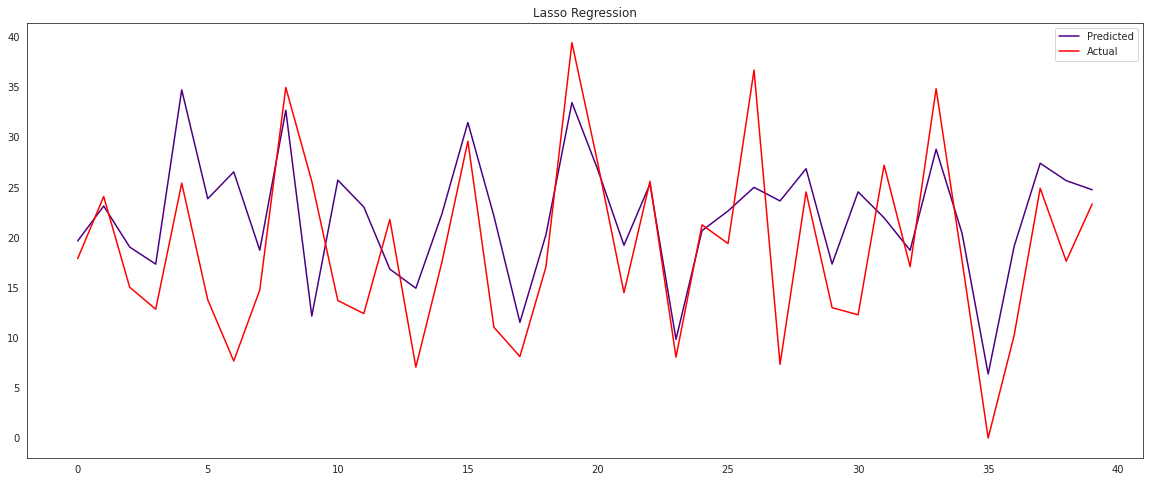

In [ ]:
#Plotting the figure for Lasso Regression
plt.figure(figsize=(20,8))
plt.plot(np.array(Y_pred_test_lasso)[:40], color='indigo')
plt.plot(np.array(Y_test)[:40], color='r')
plt.legend(["Predicted","Actual"])
plt.title('Lasso Regression')
plt.show()
     

**RIDGE REGRESSION**

In [ ]:
#implementing Ridge Regression
ridge= Ridge(alpha=0.1)

In [ ]:
#fit the model
ridge.fit(X_train,Y_train)

Ridge(alpha=0.1)

In [ ]:
#check the score
ridge.score(X_train, Y_train)

0.6553449659823952

In [ ]:
#get the X_train and X-test value
Y_pred_train_ridge=ridge.predict(X_train)
Y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
#calculating evaluation metrics for train data
#Mean Squared Error(MSE)
MSE = mean_squared_error((Y_train), (Y_pred_train_ridge))
print('Mean Squared Error is ',MSE)

#Root Mean Squared Error(RMSE)
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error is ",RMSE)

#Mean Absolute Error(MAE)
MAE = mean_absolute_error((Y_train), (Y_pred_train_ridge))
print('Mean Absolute Error is ', MAE)

# R-Squared Error(R2)
R2 = r2_score((Y_train), (Y_pred_train_ridge))
print('R-squared Error is ', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(Y_train, Y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 is', Adj_R2)

Mean Squared Error is  53.19168763825848
Root Mean Squared Error is  7.293263168037917
Mean Absolute Error is  5.600999816387597
R-squared Error is  0.6553449659823952
Adjusted R2 is 0.6503528594641796


In [ ]:
# Arrange a dataset for comparing performance metrics in future

dict1={'Model':'Ridge Regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }

In [ ]:
#create training Dataframe for comparision of metrics
training_data=pd.DataFrame(dict1,index=[0])

In [ ]:
# Calculating evaluation Metrics for test data

#Mean Squared Error(MSE)
MSE = mean_squared_error((Y_test), (Y_pred_test_ridge))
print('MSE :',MSE)

#Root Mean Squared Error(RMSE)
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#Mean Absolute Error(MAE)
MAE = mean_absolute_error((Y_test), (Y_pred_test_ridge))
print('MAE :', MAE)

# R-squared Error
R2 = r2_score((Y_test), (Y_pred_test_ridge))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(Y_test, Y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 54.016561936125704
RMSE : 7.349596038975592
MAE : 5.673070337784142
R2 : 0.6570077738575858
Adjusted R2 : 0.6520397520420815


In [ ]:
#Arrange a dataset for comparing performance of metrics later
dict2={'Model':'Ridge Regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }

In [ ]:
#create testing Dataframe for comparision of metrics
test_data=pd.DataFrame(dict2,index=[0])

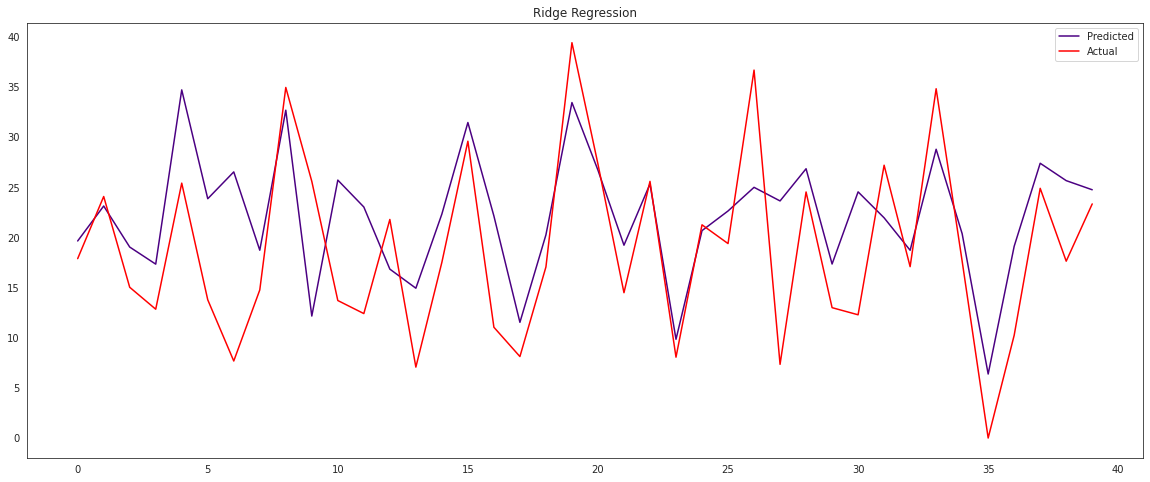

In [ ]:
#Plotting the figure for Polynomial Regression
plt.figure(figsize=(20,8))
plt.plot(np.array(Y_pred_test_lasso)[:40], color='indigo')
plt.plot(np.array(Y_test)[:40], color='r')
plt.legend(["Predicted","Actual"])
plt.title('Ridge Regression')
plt.show()
     

**ELASTIC NET REGRESSION**

In [ ]:
#import the packages
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
#fit the model
elasticnet.fit(X_train,Y_train)

ElasticNet(alpha=0.1)

In [ ]:
#check the score
elasticnet.score(X_train, Y_train)

0.6517592662800678

In [ ]:
#get the X_train and X-test value
Y_pred_train_ent=elasticnet.predict(X_train)
Y_pred_test_ent=elasticnet.predict(X_test)

In [ ]:
#calculating evaluation metrics for train data
#Mean Squared Error(MSE)
MSE = mean_squared_error((Y_train), (Y_pred_train_ent))
print('Mean Squared Error is ',MSE)

#Root Mean Squared Error(RMSE)
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error is ",RMSE)

#Mean Absolute Error(MAE)
MAE = mean_absolute_error((Y_train), (Y_pred_train_ent))
print('Mean Absolute Error is ', MAE)

# R-Squared Error(R2)
R2 = r2_score((Y_train), (Y_pred_train_ent))
print('R-squared Error is ', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(Y_train, Y_pred_train_ent))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 is', Adj_R2)

Mean Squared Error is  53.74507987021717
Root Mean Squared Error is  7.331103591562266
Mean Absolute Error is  5.632046691608693
R-squared Error is  0.6517592662800678
Adjusted R2 is 0.646715223207647


In [ ]:
# Arrange a dataset for comparing performance metrics in future

dict1={'Model':'Elastic Net Regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }

In [ ]:
#create training Dataframe for comparision of metrics
training_data=pd.DataFrame(dict1,index=[0])

In [ ]:
# Calculating evaluation Metrics for test data

#Mean Squared Error(MSE)
MSE = mean_squared_error((Y_test), (Y_pred_test_ent))
print('MSE :',MSE)

#Root Mean Squared Error(RMSE)
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#Mean Absolute Error(MAE)
MAE = mean_absolute_error((Y_test), (Y_pred_test_ent))
print('MAE :', MAE)

# R-squared Error
R2 = r2_score((Y_test), (Y_pred_test_ent))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(Y_test, Y_pred_test_ent))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 54.90797229118567
RMSE : 7.409991382666087
MAE : 5.739597668128638
R2 : 0.6513475316813073
Adjusted R2 : 0.6462975248980123


In [ ]:
#Arrange a dataset for comparing performance of metrics later
dict2={'Model':'Elastic Net Regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }

In [ ]:
#create testing Dataframe for comparision of metrics
test_data=pd.DataFrame(dict2,index=[0])

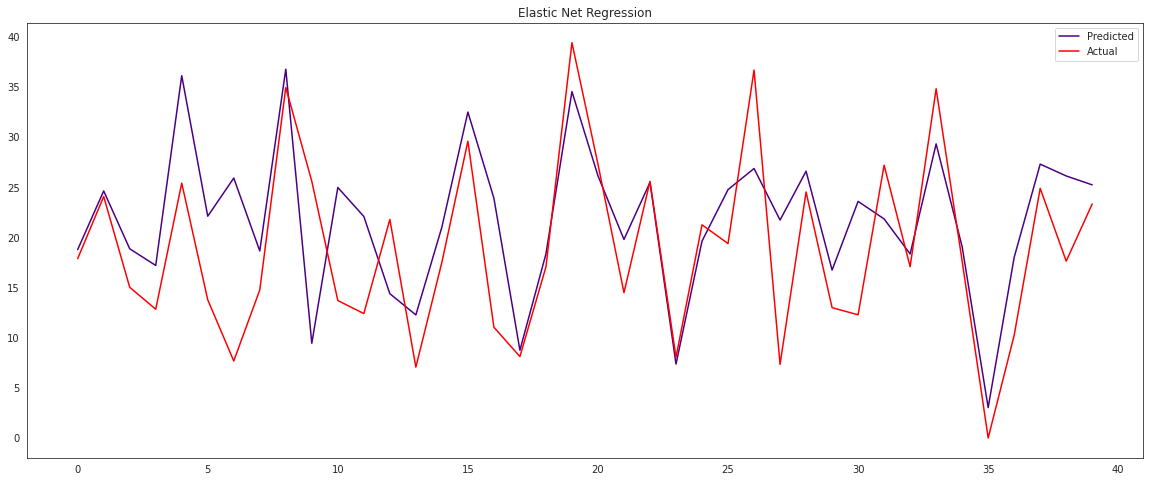

In [ ]:
#Plotting the figure for Polynomial Regression
plt.figure(figsize=(20,8))
plt.plot(np.array(Y_pred_test_ent)[:40], color='indigo')
plt.plot(np.array(Y_test)[:40], color='r')
plt.legend(["Predicted","Actual"])
plt.title('Elastic Net Regression')
plt.show()
     

**POLYNOMIAL REGRESSION**

In [ ]:
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly=poly.fit_transform(X_test)
poly.fit(X_train,Y_train)

PolynomialFeatures()

In [ ]:
# Predicted Train & Test values
reg = LinearRegression()
reg.fit(X_train_poly,Y_train)
Y_pred_train=reg.predict(X_train_poly)
Y_pred_test = reg.predict(X_test_poly)
r2_score(Y_test,Y_pred_test)

0.7636686203064712

In [ ]:
#Calculating Evaluation Metrics for train data

#Mean Squared Error(MSE)
MSE = mean_squared_error((Y_train), (Y_pred_train))
print('MSE :',MSE)

#Root Mean Squared Error
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#Mean Absolute Error
MAE = mean_absolute_error((Y_train), (Y_pred_train))
print('MAE :', MAE)

#R-squared error
R2 = r2_score((Y_train), (Y_pred_train))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(Y_train, Y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 33.04928084056067
RMSE : 5.748850392953418
MAE : 4.262401952789473
R2 : 0.7858574992050441
Adjusted R2 : 0.7827557827972377


In [ ]:
#Arrange a dataset for comparing performance of metrics 

dict1={'Model':'Polynomial regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }


In [ ]:
#create a training Dataframe for comparing metrics
training_data=training_data.append(dict1,ignore_index=True)
     

In [ ]:
# Calculating evaluation Metrics for test data

#Mean Squared Error(MSE)
MSE = mean_squared_error((Y_test), (Y_pred_test))
print('MSE :',MSE)

#Root Mean Squared Error(RMSE)
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#Mean Absolute Error(MAE)
MAE = mean_absolute_error((Y_test), (Y_pred_test))
print('MAE :', MAE)

# R-squared Error
R2 = r2_score((Y_test), (Y_pred_test))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(Y_test, Y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)
     

MSE : 37.21894444151347
RMSE : 6.1007331068908
MAE : 4.4913074860447
R2 : 0.7636686203064712
Adjusted R2 : 0.7602455122576078


In [ ]:
# Arranging a dataset for comparing performance metrics later

dict2={'Model':'Polynomial regression ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }


In [ ]:
#create a testing Dataframe for comparing metrics 
test_data=test_data.append(dict2,ignore_index=True)

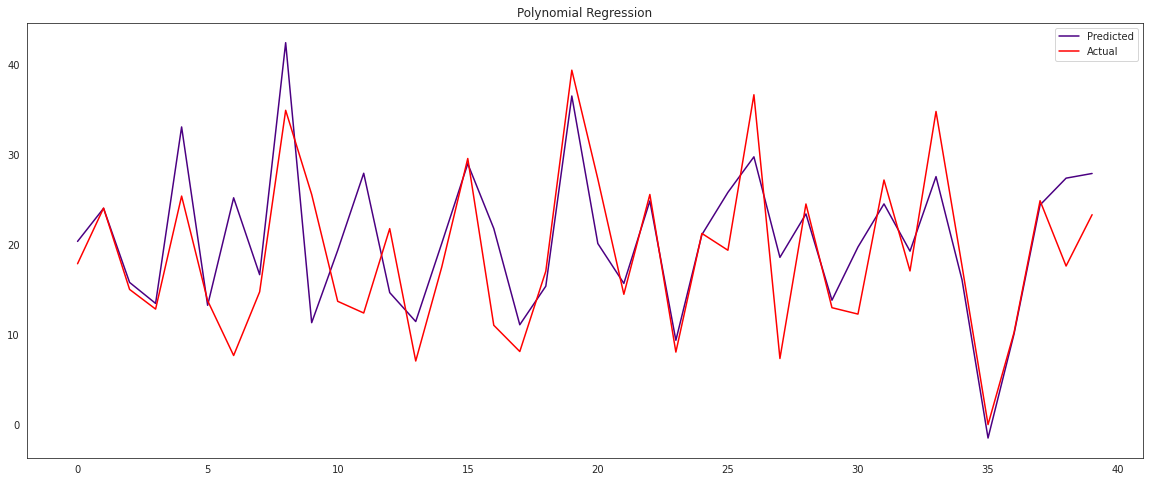

In [ ]:
#Plotting the figure for Polynomial Regression
plt.figure(figsize=(20,8))
plt.plot(np.array(Y_pred_test)[:40], color='indigo')
plt.plot(np.array(Y_test)[:40], color='r')
plt.legend(["Predicted","Actual"])
plt.title('Polynomial Regression')
plt.show()
     

**RANDOM FOREST REGRESSION:**

In [ ]:
#implementing random forest regression
RF=RandomForestRegressor()

In [ ]:
#hyperparameter tuning

#number of trees in the random forest
n_estimators = [5,20,50,100]
#number of features at every split
max_features = ['auto', 'sqrt'] 
#maximum number of levels in each decision tree
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] 
#minimum sample number to split a node
min_samples_split = [2, 6, 10] 
#minimum sample number that can be stored in a leaf node
min_samples_leaf = [1, 3, 4] 
#method used to sample data points
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}
     

In [ ]:
# Using Randomized search Cv
from sklearn.model_selection import RandomizedSearchCV
RF_random = RandomizedSearchCV(estimator = RF,param_distributions = random_grid,cv = 5, verbose=2, random_state=0, n_jobs = -1)
     

In [ ]:
RF_model = RF_random.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
#print the best parameters
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', RF_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': True}  



In [ ]:
##Using the best parameters to train our model
RF_model_final = RandomForestRegressor(n_estimators = 100, min_samples_split = 10, min_samples_leaf = 3, max_features = 'auto', max_depth = 90, bootstrap = True)
RF_model_final.fit(X_train, Y_train)

RandomForestRegressor(max_depth=90, min_samples_leaf=3, min_samples_split=10)

In [ ]:
RF.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
#Train test values
Y_pred_train_RF = RF.predict(X_train)
Y_pred_test_RF = RF.predict(X_test)

In [ ]:
# Calculating evaluation Metrics for train data

#Mean Squared Error(MSE)
MSE = mean_squared_error((Y_train), (Y_pred_train_RF))
print('MSE :',MSE)

#Root Mean Squared Error(RMSE)
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#Mean Absolute Error(MAE)
MAE = mean_absolute_error((Y_train), (Y_pred_train_RF))
print('MAE :', MAE)

#R-Squared Error
R2 = r2_score((Y_train), (Y_pred_train_RF))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(Y_train, Y_pred_train_RF))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 1.6573824484212454
RMSE : 1.2873936648986763
MAE : 0.8363173370831899
R2 : 0.9892610061928182
Adjusted R2 : 0.9891054587738266


In [ ]:
#creating a dataset for comparision of metrics

dict1={'Model':'Random forest regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2),3)
      }

In [ ]:
#create a training dataframe for comparing evaluation metris
training_data=training_data.append(dict1,ignore_index=True)

In [ ]:
#calculating evaluation metrics for test data

#Mean Squared Error(MSE)
MSE = mean_squared_error((Y_test), (Y_pred_test_RF))
print('MSE :',MSE)

#Root Mean Squared Error(RMSE)
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#Mean Absolute Error(MAE)
MAE = mean_absolute_error((Y_test), (Y_pred_test_RF))
print('MAE :', MAE)

# R-Squared Error(R-2)
R2 = r2_score((Y_test), (Y_pred_test_RF))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(Y_test, Y_pred_test_RF))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 12.44036011986829
RMSE : 3.5270894686509284
MAE : 2.319062057122996
R2 : 0.921006693899316
Adjusted R2 : 0.919862526661473


In [ ]:
#create a dataset for comparision of metrics 

dict2={'Model':'Random forest regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }


In [ ]:
#create a testing dataframe for comparing evaluation metrics
test_data=test_data.append(dict2,ignore_index=True)

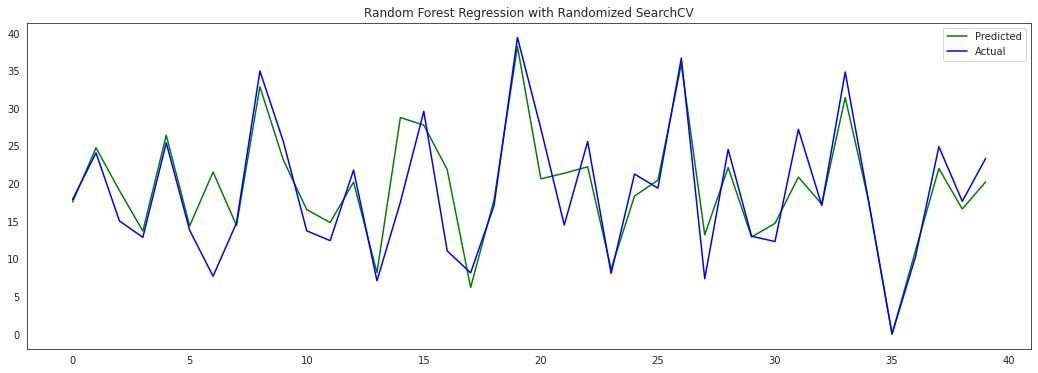

In [ ]:
#Plotting the figure for Random Forest Regression
plt.figure(figsize=(18,6))
plt.plot(np.array(Y_pred_test_RF)[:40], color='green')
plt.plot(np.array(Y_test)[:40], color='blue')
plt.legend(["Predicted","Actual"])
plt.title('Random Forest Regression with Randomized SearchCV')
plt.show()
     

**DECISION TREE REGRESSION**

**without gridsearch cv**

In [ ]:
data_regressor = DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=10, max_leaf_nodes=1000)
     

In [ ]:
data_regressor.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=10,
                      max_leaf_nodes=1000)

In [ ]:
#Train and Test values
Y_pred_train_data = data_regressor.predict(X_train)
Y_pred_test_data = data_regressor.predict(X_test)

In [ ]:
#calculating evaluation metrics for train data

#Mean Squared Error(MSE)
MSE = mean_squared_error((Y_train), (Y_pred_train_data))
print('MSE :',MSE)

#Root Mean Squared Error(RMSE)
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#Mean Absolute Error(MAE)
MAE = mean_absolute_error((Y_train), (Y_pred_train_data))
print('MAE :', MAE)

# R-Squared Error(R2)
R2 = r2_score((Y_train), (Y_pred_train_data))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(Y_train, Y_pred_train_data))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 6.2976680263094496
RMSE : 2.509515496327817
MAE : 1.7287252934410775
R2 : 0.9591943199358446
Adjusted R2 : 0.9586032759024704


In [ ]:
#create a dataset for comparing performance metrics 

dict1={'Model':'Decision tree regression without GSCV',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }

In [ ]:
#create a dataframe for comparing metrics
training_data=training_data.append(dict1,ignore_index=True)

In [ ]:
#calculating evaluation Metrics for test data

#Mean Squared Error(MSE)
MSE = mean_squared_error((Y_test), (Y_pred_test_data))
print('MSE :',MSE)

#Root Mean Squared Error(RMSE)
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#Mean Absolute Error(MAE)
MAE = mean_absolute_error((Y_test), (Y_pred_test_data))
print('MAE :', MAE)

#R-Squared Error
R2 = r2_score((Y_test), (Y_pred_test_data))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(Y_test, Y_pred_test_data))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 23.28877282310993
RMSE : 4.825844260138316
MAE : 3.251863593014549
R2 : 0.8521218724699835
Adjusted R2 : 0.8499799528939403


In [ ]:
#creating a dataset for comparision of metrics

dict2={'Model':'Decision tree regression without GSCV ',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }

In [ ]:
#create a testing dataframe for comparing metrics
test_data=test_data.append(dict2,ignore_index=True)

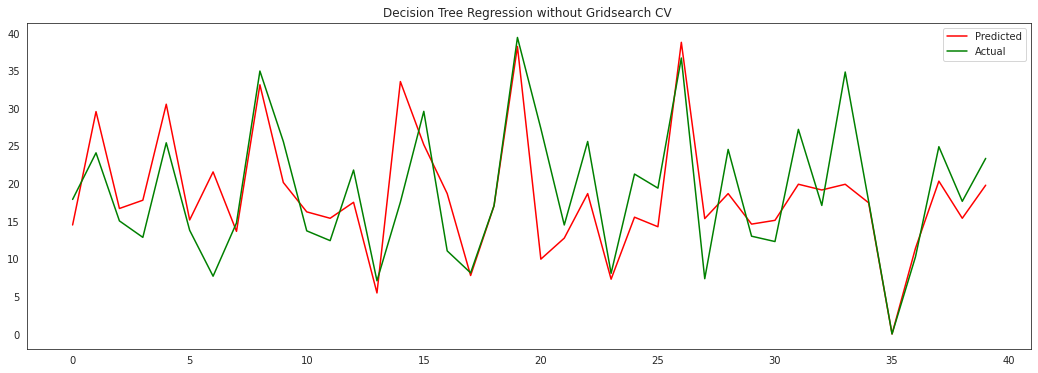

In [ ]:
#Plotting the figure for Decision Tree Regression
plt.figure(figsize=(18,6))
plt.plot(np.array(Y_pred_test_data)[:40], color='r')
plt.plot(np.array(Y_test)[:40], color='g')
plt.legend(["Predicted","Actual"])
plt.title('Decision Tree Regression without Gridsearch CV ')
plt.show()
     


**with gridsearch cv**

In [ ]:
data_params = {'max_depth':np.arange(1,50,2),'min_samples_leaf':np.arange(2,15)}


In [ ]:
data_regressor = DecisionTreeRegressor()

In [ ]:
grid_data = GridSearchCV(data_regressor,data_params,cv=3)
grid_data.fit(X_train,Y_train)
p = grid_data.best_params_
data_regressor=DecisionTreeRegressor(max_depth=p['max_depth'],min_samples_leaf= p['min_samples_leaf'])


In [ ]:
data_regressor.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=23, min_samples_leaf=7)

In [ ]:
data_regressor.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=23, min_samples_leaf=7)

In [ ]:
#calculating evaluation metrics for train data

#Mean Squared Error(MSE)
MSE = mean_squared_error((Y_train), (Y_pred_train_data))
print('MSE :',MSE)

#Root Mean Squared Error(RMSE)
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#Mean Absolute Error(MAE)
MAE = mean_absolute_error((Y_train), (Y_pred_train_data))
print('MAE :', MAE)

#R-Squared Error(R2)
R2 = r2_score((Y_train), (Y_pred_train_data))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(Y_train, Y_pred_train_data))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 6.2976680263094496
RMSE : 2.509515496327817
MAE : 1.7287252934410775
R2 : 0.9591943199358446
Adjusted R2 : 0.9586032759024704


In [ ]:
#creating a dataset for comparing evaluation metrics 

dict1={'Model':'Decision tree regression with GSCV',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }

In [ ]:
#create a training dataframe for comparing metrics
training_data=training_data.append(dict1,ignore_index=True)

In [ ]:
#calculating Performance Metrics for test data

#Mean Squared Error(MSE)
MSE = mean_squared_error((Y_test), (Y_pred_test_data))
print('MSE :',MSE)

#Root Mean Squared Error(RMSE)
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#Mean Absolute Error
MAE = mean_absolute_error((Y_test), (Y_pred_test_data))
print('MAE :', MAE)

#R-squared Error(R2)
R2 = r2_score((Y_test), (Y_pred_test_data))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(Y_test, Y_pred_test_data))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 23.28877282310993
RMSE : 4.825844260138316
MAE : 3.251863593014549
R2 : 0.8521218724699835
Adjusted R2 : 0.8499799528939403


In [ ]:
#creating a dataset for comparing evaluation metrics 

dict2={'Model':'Decision tree regression with GSCV',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),2)
       }

In [ ]:
#create a testing dataframe for comparing metrics
test_data=test_data.append(dict2,ignore_index=True)

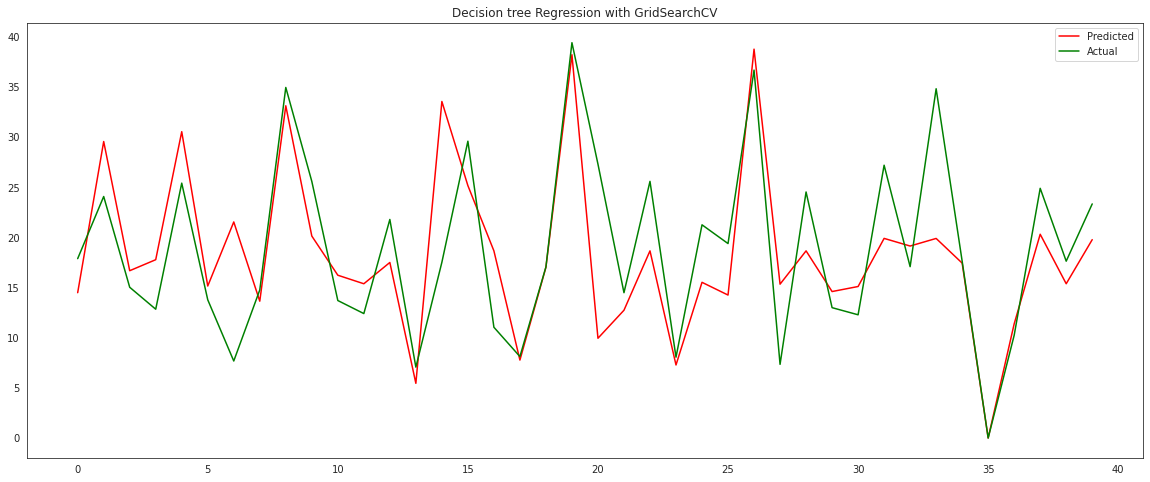

In [ ]:
#Plotting the figure for Decision Tree Regression
plt.figure(figsize=(20,8))
plt.plot(np.array(Y_pred_test_data)[:40], color='r')
plt.plot(np.array(Y_test)[:40], color='g')
plt.legend(["Predicted","Actual"])
plt.title('Decision tree Regression with GridSearchCV')
plt.show()
     

**GRADIENT BOOSTING REGRESSION**

In [ ]:
gbregressor = GradientBoostingRegressor()

In [ ]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.8, 0.6, 0.4, 0.2],
                  'n_estimators' : [100,500],
                  'max_depth'    : [2,4,6]
              }
gbregressor_random = RandomizedSearchCV(estimator = gbregressor,param_distributions = parameters, cv = 5, verbose=2, random_state=0, n_jobs = -1)
     

In [ ]:
gbregressor_model = gbregressor_random.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
#priniting the best parameters
print ('Random grid for GBR: ', parameters, '\n')
#print the best parameters
print ('Best Parameters for GBR: ', gbregressor_random.best_params_, ' \n')

Random grid for GBR:  {'learning_rate': [0.01, 0.02, 0.03, 0.04], 'subsample': [0.8, 0.6, 0.4, 0.2], 'n_estimators': [100, 500], 'max_depth': [2, 4, 6]} 

Best Parameters for GBR:  {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.03}  



In [ ]:
#training the model by using best parameters
gbregressor_final_model = GradientBoostingRegressor(learning_rate = 0.03, subsample = 0.8, n_estimators = 500, max_depth =6)
gbregressor_final_model.fit(X_train, Y_train)
     

GradientBoostingRegressor(learning_rate=0.03, max_depth=6, n_estimators=500,
                          subsample=0.8)

In [ ]:
#splitting train and test values
Y_pred_train_rf = gbregressor_final_model.predict(X_train)
Y_pred_test_rf = gbregressor_final_model.predict(X_test)
     

In [ ]:
#calculating evaluation metrics for train data

#Mean Squared Error(MSE)
MSE = mean_squared_error((Y_train), (Y_pred_train_rf))
print('MSE :',MSE)

#Root Mean Squared Error(RMSE)
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#Mean Absolute Error(MAE)
MAE = mean_absolute_error((Y_train), (Y_pred_train_rf))
print('MAE :', MAE)

# R
R2 = r2_score((Y_train), (Y_pred_train_rf))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(Y_train, Y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 3.3690998712857727
RMSE : 1.8355107930180559
MAE : 1.2800554726249387
R2 : 0.9781699494356423
Adjusted R2 : 0.9778537551922419


In [ ]:
#creating a dataset for comparing performance metrics

dict1={'Model':'Gradient Boosting Regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),3)
       }

In [ ]:
#create a training dataframe for comparing metrics
training_data=training_data.append(dict1,ignore_index=True)

In [ ]:
#calculating evaluation metrics for test data

#Mean Squared Error(MSE)
MSE = mean_squared_error((Y_test), (Y_pred_test_rf))
print('MSE :',MSE)

#Root Mean Squared Error(RMSE)
RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

#Mean Absolute Error(MAE)
MAE = mean_absolute_error((Y_test), (Y_pred_test_rf))
print('MAE :', MAE)

#R-Squared Error(R2)
R2 = r2_score((Y_test), (Y_pred_test_rf))
print('R2 :', R2)

# Adjusted R2
Adj_R2 = (1-(1-r2_score(Y_test, Y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print( 'Adjusted R2 :', Adj_R2)

MSE : 9.795247270410414
RMSE : 3.129735974552872
MAE : 2.049571511252541
R2 : 0.9378025267349245
Adjusted R2 : 0.9369016363342136


In [ ]:
#creating a dataset for comparing performance metrics 

dict2={'Model':'Gradient Boosting Regression',
       'MAE':round((MAE),3),
       'MSE':round((MSE),3),
       'RMSE':round((RMSE),3),
       'R2':round((R2),3),
       'Adj_R2':round((Adj_R2 ),3)
       }
     


In [ ]:
#create a testing dataframe for comparing metrics
test_data=test_data.append(dict2,ignore_index=True)

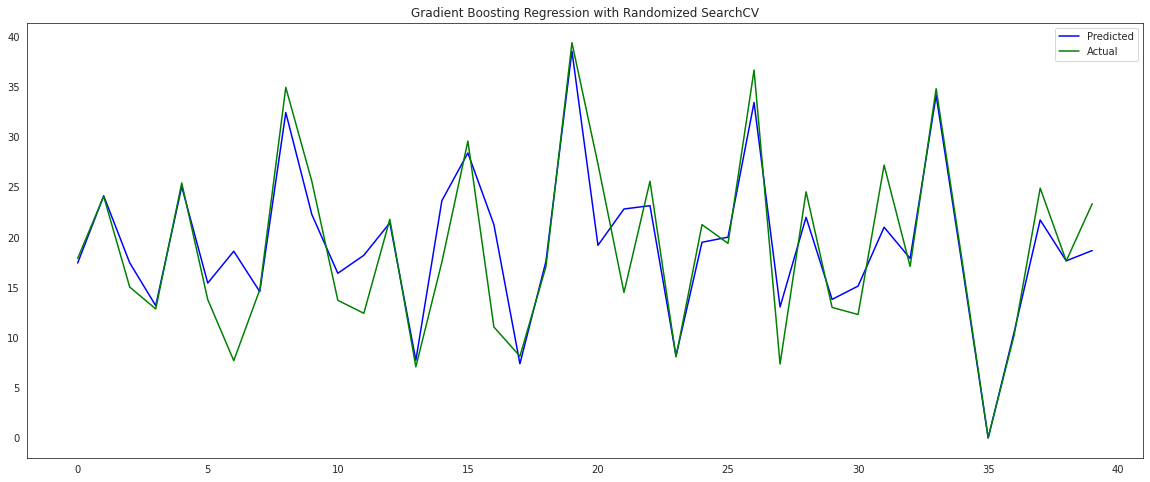

In [ ]:
#plotting the figure for Gradient Boosting Regression 
plt.figure(figsize=(20,8))
plt.plot(np.array(Y_pred_test_rf)[:40], color='blue')
plt.plot(np.array(Y_test)[:40], color='g')
plt.legend(["Predicted","Actual"])
plt.title('Gradient Boosting Regression with Randomized SearchCV')
plt.show()
     


In [ ]:
#view the results of evaluation metrics values for all models

model=pd.concat([training_data,test_data],keys=['Training_set','Testing_set'])
Model_com_df=pd.DataFrame(model)
Model_com_df.columns=['Model',	'MAE',	'MSE'	,'RMSE',	'R2'	,'Adj_R2']
Model_com_df.style.highlight_max(color = 'pink', axis = 0)


**Feature Importance:**

In [ ]:
gbregressor_random.best_estimator_

GradientBoostingRegressor(learning_rate=0.03, max_depth=6, n_estimators=500,
                          subsample=0.8)

In [ ]:
gb_optimal_model = gbregressor_random.best_estimator_
     

In [ ]:
gb_optimal_model.feature_importances_
     

array([0.2386535 , 0.28717457, 0.10517304, 0.00519903, 0.00825517,
       0.03767601, 0.05887474, 0.00129045, 0.00437246, 0.15222059,
       0.01365593, 0.00752271, 0.0133509 , 0.00163706, 0.00100078,
       0.04419018, 0.00055885, 0.0006154 , 0.00101544, 0.0015354 ,
       0.00694179, 0.00671363, 0.00116714, 0.00071169, 0.00049355])

In [ ]:
X_train = pd.DataFrame(X_train, columns = X.columns)

In [ ]:
features = X_train.columns
importance = gb_optimal_model.feature_importances_
index = np.argsort(importance)
     

Text(0.5, 0, 'Relative Importance')

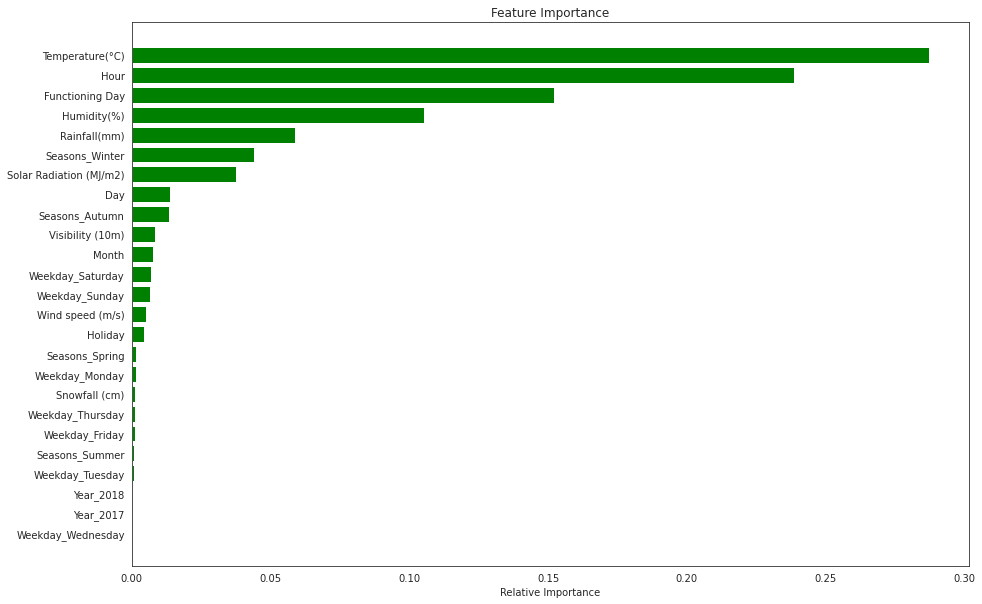

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Feature Importance')
plt.barh(range(len(index)), importance[index],align='center',color='green')
plt.yticks(range(len(index)), [features[i] for i in index])
plt.xlabel('Relative Importance')
     

From above analysis I observe that Temperature has a heighest priority than other features.

**conclusion:**

In the given dataset there was no strong linear relationship between dependent 

variable ‘Rented Bike Count’ and independent variables.My observations in 

exploratory data analysis part are;

● The people used rental bikes highly in year 2018 as compared to the year 
2017

● The usage of rented bikes highly between 5 to 10 months

● The people who use rented bikes are decreased on Sunday as compared to 
the other days

● There is rented bikes count on non functioning day

● The people use rental bikes highly between 7 A.M to 9 A.M and 5 P.M to 9 
P.M

● Rental bikes count is maximum in summer season and minimum in winter
season.

● The people use rental bikes minimum on holidays as compared to the 
working days.

In Regression analysis I observed that

● If there is increase in temperature then the count of rental bikes is 
increasing.

● More number of bikes are rented if there is low humidity

After analysing the all models I observed that 

➔ When we compared the Root mean squared error in each model

Random Forest Regression has the best R2 score.So this is the best 

fitting model.After this Gradient Boosting Regression is the best 

fitting model.